<a href="https://colab.research.google.com/github/rohitashwachaks/advanced_optimisation/blob/main/Assignments/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework-1

rc47878

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


In [2]:
def gray2bw(arr: np.array, threshold: int = 0.8):
  return np.where(arr > threshold, 1, 0)

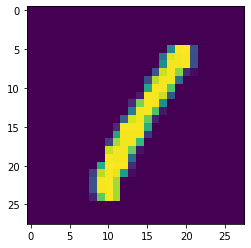

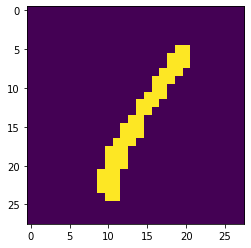

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

img = x_train[3]
plt.imshow(img)
plt.show()
plt.imshow(gray2bw(img))

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


In [4]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))
xshape = x_train.shape[1:4]
print(xshape)

(28, 28, 1)


## Model

In [5]:
x_train = gray2bw(x_train)
x_test = gray2bw(x_test)

In [6]:
class MNIST_Model:
  def __init__(self)-> tf.keras.models.Sequential:
    self.model =  tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=32,kernel_size=6,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.Conv2D(filters=64,kernel_size=5,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
          tf.keras.layers.Conv2D(filters=64,kernel_size=5,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.Conv2D(filters=128,kernel_size=4,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
          tf.keras.layers.Dense(10,activation=tf.nn.softmax)
          ])
    print(self.model.summary())
    return

  def compile(self)->None:
    self.model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
  def fit(self, x_train, y_train, epochs=50, validation_split=0.2, batch_size = 250):
    if validation_split:
      self.history = self.model.fit(x_train,y_train,epochs=epochs,validation_split=0.2,batch_size=batch_size)
    else:
      self.history = self.model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)
    return

  def preds(self, x_train):
    return self.model.predict(x_test)

  def plot(self):
    plt.plot(self.history.history['loss'])
    if 'val_loss' in self.history.history:
      plt.plot(self.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [7]:
cnn_model = MNIST_Model()
cnn_model.compile()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          102464    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                    

Epoch 1/75
192/192 [==============================] - 10s 26ms/step - loss: 0.6112 - accuracy: 0.8651 - val_loss: 0.2788 - val_accuracy: 0.9617
Epoch 2/75
192/192 [==============================] - 4s 21ms/step - loss: 0.2508 - accuracy: 0.9674 - val_loss: 0.2028 - val_accuracy: 0.9765
Epoch 3/75
192/192 [==============================] - 4s 20ms/step - loss: 0.1879 - accuracy: 0.9786 - val_loss: 0.1617 - val_accuracy: 0.9835
Epoch 4/75
192/192 [==============================] - 3s 17ms/step - loss: 0.1558 - accuracy: 0.9815 - val_loss: 0.1445 - val_accuracy: 0.9836
Epoch 5/75
192/192 [==============================] - 3s 16ms/step - loss: 0.1276 - accuracy: 0.9852 - val_loss: 0.1227 - val_accuracy: 0.9862
Epoch 6/75
192/192 [==============================] - 3s 16ms/step - loss: 0.1074 - accuracy: 0.9875 - val_loss: 0.1115 - val_accuracy: 0.9858
Epoch 7/75
192/192 [==============================] - 3s 16ms/step - loss: 0.0905 - accuracy: 0.9888 - val_loss: 0.0988 - val_accuracy: 0.986

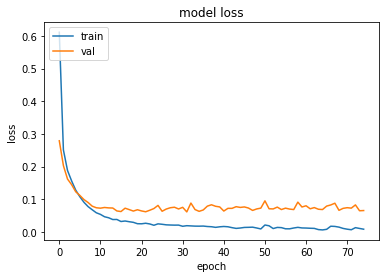

In [8]:
cnn_model.fit(x_train,y_train,epochs=75)
cnn_model.plot()


In [9]:
# Test set accuracy
pred_probs2 = cnn_model.model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.991


## Retraining on the whole Data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 23, 23, 32)        1184      
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 64)          102464    
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                  

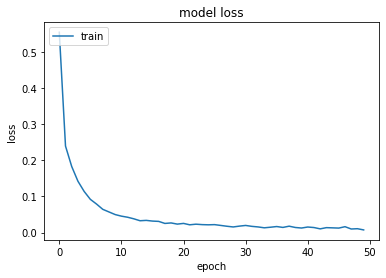

In [10]:
cnn_model = MNIST_Model()
cnn_model.compile()
cnn_model.fit(x_train, y_train, epochs=50, validation_split=None)
cnn_model.plot()

## How does retraining on the whole training set impact on the MNIST test set?

In [11]:
pred_probs2 = cnn_model.model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.9908


Test Accuracy has increased. 

WHY??

## Missclassification Plots

In [12]:
missclassified_index = np.where(pred2!= y_test)[0]
missclassified = x_test[missclassified_index]
print(missclassified.shape)
missclassified = np.reshape(missclassified, missclassified.shape[0:3])
print(missclassified.shape)

(92, 28, 28, 1)
(92, 28, 28)


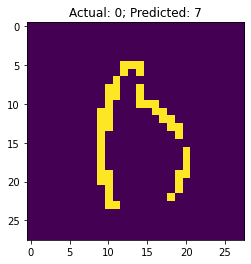

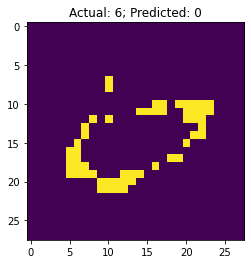

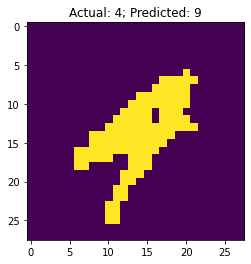

In [13]:
for index, k in enumerate(missclassified_index[:3]):
  plt.imshow(missclassified[index])
  plt.title(f'Actual: {y_test[k]}; Predicted: {pred2[k]}')
  plt.show()

      0     1     2     3     4     5     6     7     8     9
0  10.0   1.0   1.0   0.0   0.0   1.0   2.0   2.0   2.0   0.0
1   0.0  10.0   0.0   1.0   0.0   0.0   0.0   2.0   0.0   0.0
2   1.0   0.0  10.0   1.0   0.0   0.0   0.0   3.0   0.0   0.0
3   0.0   0.0   2.0  10.0   0.0   1.0   0.0   2.0   0.0   0.0
4   0.0   0.0   0.0   0.0  10.0   1.0   1.0   2.0   0.0   3.0
5   0.0   1.0   0.0   3.0   0.0  10.0   1.0   1.0   0.0   0.0
6   2.0   2.0   1.0   0.0   1.0   2.0  10.0   0.0   1.0   0.0
7   0.0   2.0   2.0   0.0   0.0   0.0   0.0  10.0   0.0   1.0
8   0.0   1.0   2.0   2.0   0.0   3.0   0.0   0.0  10.0   0.0
9   1.0   1.0   0.0   0.0   3.0   1.0   0.0   3.0   2.0  10.0


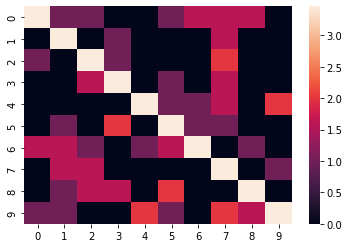

In [14]:
import seaborn as sns
import pandas as pd

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=pred2, num_classes=10)

# scaling the confusion matrix to highlight missclassification:
confusion_matrix = np.round(np.log2(confusion_matrix+1))
print(pd.DataFrame(confusion_matrix, index = [i for i in range(10)], columns = [i for i in range(10)]))
sns.heatmap(np.log2(confusion_matrix+1))

Most commonly missclassified are:
<table>
  <thead>
    <td>Actual</td>
    <td>Predicted</td>
  </thead>
  <tr>
    <td>3</td>
    <td>5 , 8</td>
  </tr>
  <tr>
    <td>5</td>
    <td>3</td>
  </tr>
  <tr>
    <td>6</td>
    <td>0 , 1 , 5 , 8</td>
  </tr>
  <tr>
    <td>7</td>
    <td>1</td>
  </tr>
  <tr>
    <td>9</td>
    <td>0 , 4 , 7</td>
  </tr>
</table>